# **<font color = purple> Project: Predicting Vehicle Prices: A Comprehensive Data Analysis and Modeling Approach**

### Business Understanding

**Objective**: The goal of this analysis is to understand the factors affecting the pricing of vehicles based on various attributes such as Engine capacity, Power, Mileage, and the number of Seats. By examining these attributes, we aim to identify key trends and insights that can help stakeholders make informed decisions regarding vehicle pricing, marketing strategies, and inventory management.

**Context**: In the automotive market, understanding how different features and specifications influence pricing is crucial for manufacturers, dealers, and consumers. By gaining insights into these relationships, businesses can better position their products, optimize pricing strategies, and enhance customer satisfaction.

#### Key Areas of Focus:
1. **Price Influencers**: Analyze how different features like Engine size, Power output, Mileage, and Seating capacity correlate with vehicle prices.
2. **Market Segmentation**: Identify potential segments within the data that could indicate different pricing strategies based on consumer preferences.
3. **Outlier Analysis**: Understand the implications of outliers in pricing, especially for premium brands or high-performance vehicles.
4. **Trend Analysis**: Investigate trends over time or by region to determine how external factors (like economic conditions or fuel prices) may impact vehicle pricing.

## Overview of Steps Followed

Here’s a brief summary of the process I went through:

- **Imported and cleaned the dataset.**
- **Conducted exploratory data analysis (EDA)** to examine the correlation of individual features with price and draw conclusions.
- **Implemented Linear Regression** to analyze each correlation of individual features against price.
- Initially used a **Multiple Regression Model** on the dataset. However, the model was not perfect and yielded negative price predictions. To address this, I opted for a **Random Forest Regressor**, which performed significantly better, achieving an **R² score of 91%**.
- Employed **Train-Test Split** for cross-validation, and utilized **K-Folds** to enhance the accuracy of the model's performance.



In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_excel('training_data.xlsx')
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74



## <font color='purple'>Section 1: DATA CLEANING</font>

In [43]:
pd.options.mode.chained_assignment = None
print(train.isnull().sum())
print('Size of training data set: ',train.shape)

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64
Size of training data set:  (6019, 12)


In [44]:
for column in ['Engine', 'Power', 'Seats']:
  percentage_null = (train[column].isnull().sum() / len(train)) * 100
  print(f"Percentage of null values in {column}: {percentage_null:.2f}%")

Percentage of null values in Engine: 0.60%
Percentage of null values in Power: 0.60%
Percentage of null values in Seats: 0.70%


### <font color='purple'>Since the missing values are quite less, we shall remove the columns with null values.</font>

- Removing missing rows.
- Removing units from values to make them easier to convert to numerical types.
- Filtering out rows with placeholder text ('null').



In [45]:
train.dropna(how='any', inplace=True)
train['Mileage'] = train.Mileage.str.replace('km/kg','')
train['Mileage'] = train.Mileage.str.replace('kmpl','')
train['Engine'] = train.Engine.str.replace('CC','')
train['Power'] = train['Power'].str.replace('bhp', '')
train['Power'] = train['Power'].str.strip()
train = train[train['Power'] != 'null']
train['Power'] = train['Power'].astype(float)
train['Mileage'] = train['Mileage'].astype(float)
train['Engine'] = train['Engine'].astype(float)

train.head()
print(train.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


In [46]:
print('Current Dataset size: ', train.shape)
print('Features: ', train.columns.values)

Current Dataset size:  (5872, 12)
Features:  ['Name' 'Location' 'Year' 'Kilometers_Driven' 'Fuel_Type' 'Transmission'
 'Owner_Type' 'Mileage' 'Engine' 'Power' 'Seats' 'Price']


In [47]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### As the car brand is the first word in the name of the car, we can extract name[0] as the brand and add a new column: brand.

In [48]:
brand = []
for name in train['Name'].str.split():
    brand.append(name[0])
train['Brand'] = brand
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


## Label Encoding

In [49]:
# Converting categorical features into numerical values so that our models can interpret their contribution.

train['Fuel_Type'] = train['Fuel_Type'].astype('category')
train['Transmission'] = train['Transmission'].astype('category')
train['Location'] = train['Location'].astype('category')
train['Brand'] = train['Brand'].astype('category')
train['Owner_Type'] = train['Owner_Type'].astype('category')



```
# This is formatted as code
```


## <font color='purple'>Section 2:  Exploratory Data Analysis</font>

In [50]:
#setting theme
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
dark_violet_palette = ["#4B0082", "#5C4B8A", "#6A5ACD", "#836FFF"]
sns.set_palette(dark_violet_palette)


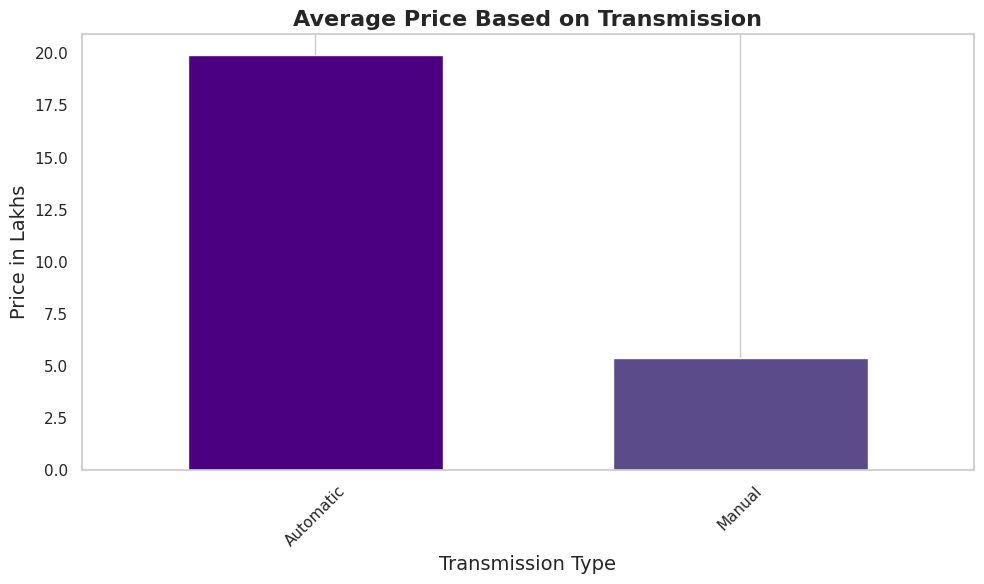

In [51]:
#Average price based on transmission type
pd.options.mode.chained_assignment = None
avg_price_by_transmission = train.groupby('Transmission', observed=True)['Price'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
avg_price_by_transmission.plot(kind='bar', color=sns.color_palette(), width=0.6)
plt.title('Average Price Based on Transmission', fontweight='bold', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Price in Lakhs', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y')  # Add horizontal grid lines for easier reading
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


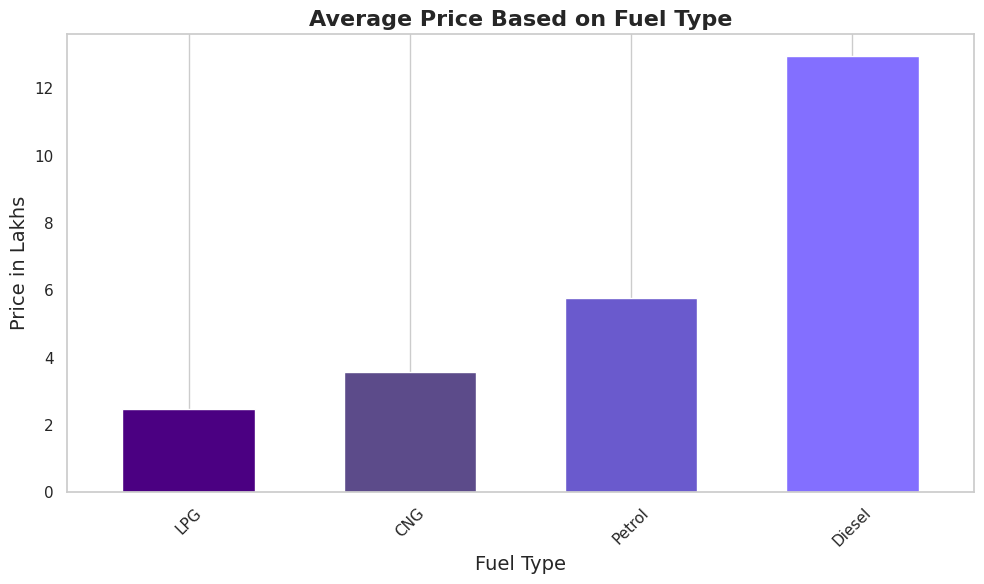

In [52]:
avg_price_by_fuel = train.groupby('Fuel_Type', observed=True)['Price'].mean().sort_values()

# bar plot
plt.figure(figsize=(10, 6))
avg_price_by_fuel.plot(kind='bar', color=sns.color_palette(), width=0.6)
plt.title('Average Price Based on Fuel Type', fontweight='bold', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price in Lakhs', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

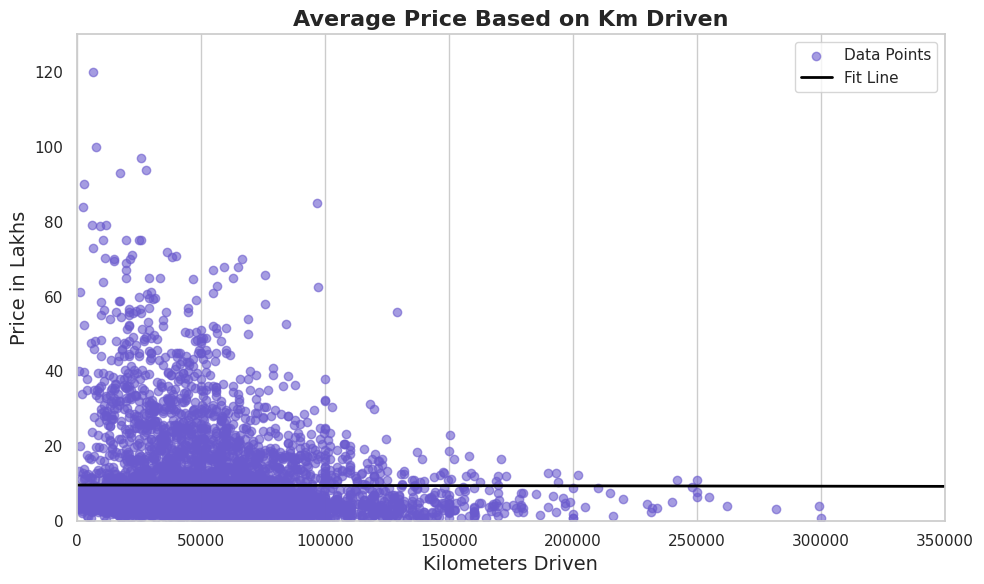

In [53]:
p = np.poly1d(np.polyfit(train['Kilometers_Driven'], train['Price'], 1))
xp = np.arange(0, 350000)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train['Kilometers_Driven'], train['Price'], color='#6A5ACD', alpha=0.6, label='Data Points')
plt.plot(xp, p(xp), color='#000000', linewidth=2, label='Fit Line')
plt.title('Average Price Based on Km Driven', fontweight='bold', fontsize=16)
plt.xlabel('Kilometers Driven', fontsize=14)
plt.ylabel('Price in Lakhs', fontsize=14)
plt.xlim([0, 350000])
plt.ylim([0, 130])
plt.grid(axis='y')  # Add horizontal grid lines for easier reading
plt.legend()  # Add legend to identify data points and fit line
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The regression line displayed above doesn't appear as we anticipated. This is likely due to an outlier that is significantly distant from the other data points, which is adversely affecting our regression model. Let's remove that outlier.

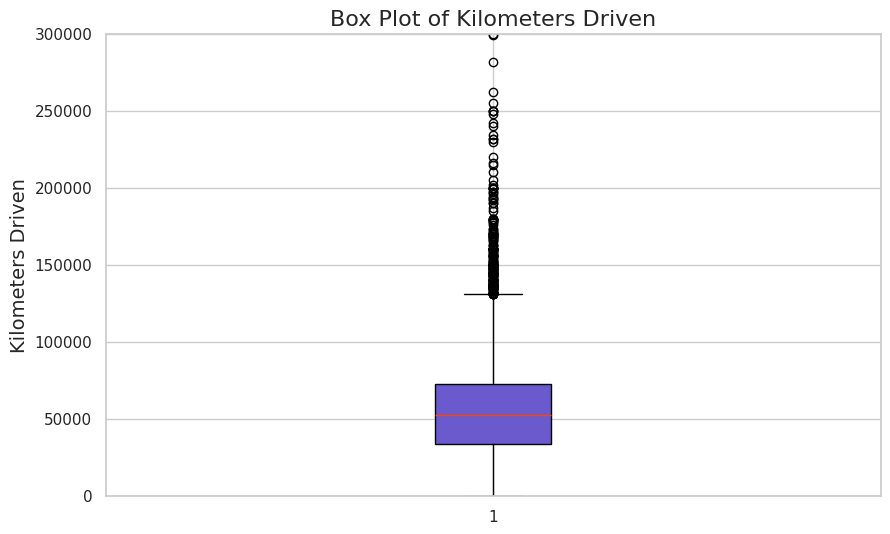

Total number of outliers:  198
Total rows of data:  5872
Outliers removed. New total rows of data:  5674


In [54]:
plt.figure(figsize=(10, 6))
plt.boxplot(train['Kilometers_Driven'], patch_artist=True, boxprops=dict(facecolor='#6A5ACD', color='#000000'),
            whiskerprops=dict(color='#000000'), capprops=dict(color='#000000'), medianprops=dict(color='#FF4500'))
plt.title('Box Plot of Kilometers Driven', fontsize=16)
plt.ylabel('Kilometers Driven', fontsize=14)
plt.ylim([0, 300000])
plt.show()

# Calculating Q1, Q2, and Q3
q1 = np.percentile(train['Kilometers_Driven'], 25)
q2 = np.percentile(train['Kilometers_Driven'], 50)
q3 = np.percentile(train['Kilometers_Driven'], 75)

# Calculating IQR and whiskers
iqr = q3 - q1
lower_whisker = train[train['Kilometers_Driven'] < q1 - 1.5 * iqr]['Kilometers_Driven'].max()
upper_whisker = train[train['Kilometers_Driven'] > q3 + 1.5 * iqr]['Kilometers_Driven'].min()  # Changed to min for upper whisker calculation

# Counting outliers
outliers_count = train[train['Kilometers_Driven'] > upper_whisker]['Kilometers_Driven'].count()
total_rows = train.shape[0]

print('Total number of outliers: ', outliers_count)
print('Total rows of data: ', total_rows)

# Removing outliers
if outliers_count > 0:
    train = train[train['Kilometers_Driven'] <= upper_whisker]
    print('Outliers removed. New total rows of data: ', train.shape[0])
else:
    print('No outliers found to remove.')

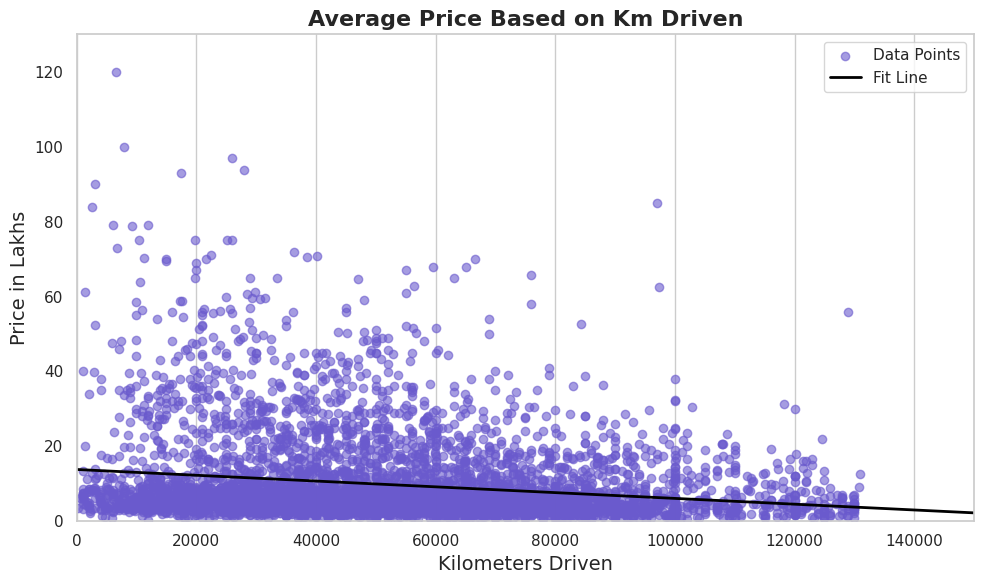

In [55]:
p = np.poly1d(np.polyfit(train['Kilometers_Driven'], train['Price'], 1))
xp = np.arange(0, 350000)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train['Kilometers_Driven'], train['Price'], color='#6A5ACD', alpha=0.6, label='Data Points')
plt.plot(xp, p(xp), color='#000000', linewidth=2, label='Fit Line')
plt.title('Average Price Based on Km Driven', fontweight='bold', fontsize=16)
plt.xlabel('Kilometers Driven', fontsize=14)
plt.ylabel('Price in Lakhs', fontsize=14)
plt.xlim([0, 150000])
plt.ylim([0, 130])
plt.grid(axis='y')  # Add horizontal grid lines for easier reading
plt.legend()  # Add legend for clarity
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

There is a slight trend indicating that as the kilometers increase, the price tends to decrease. However, this factor does not seem to have a significant impact.

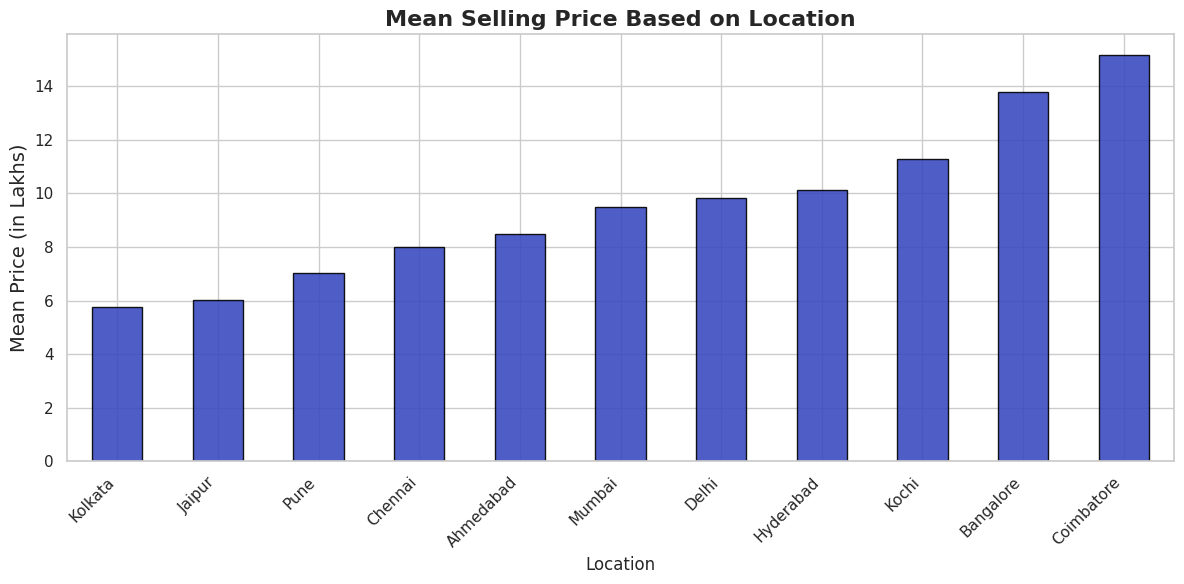

In [56]:
mean_price_by_location = train.groupby('Location', observed=True)['Price'].mean().sort_values()

# Create the bar plot
plt.figure(figsize=(12, 6))  # Increased size for better visibility
mean_price_by_location.plot(kind='bar', colormap='coolwarm', alpha=0.9, edgecolor='black')

# Adding labels and title
plt.ylabel('Mean Price (in Lakhs)', fontsize=14)
plt.title('Mean Selling Price Based on Location', fontweight='bold', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

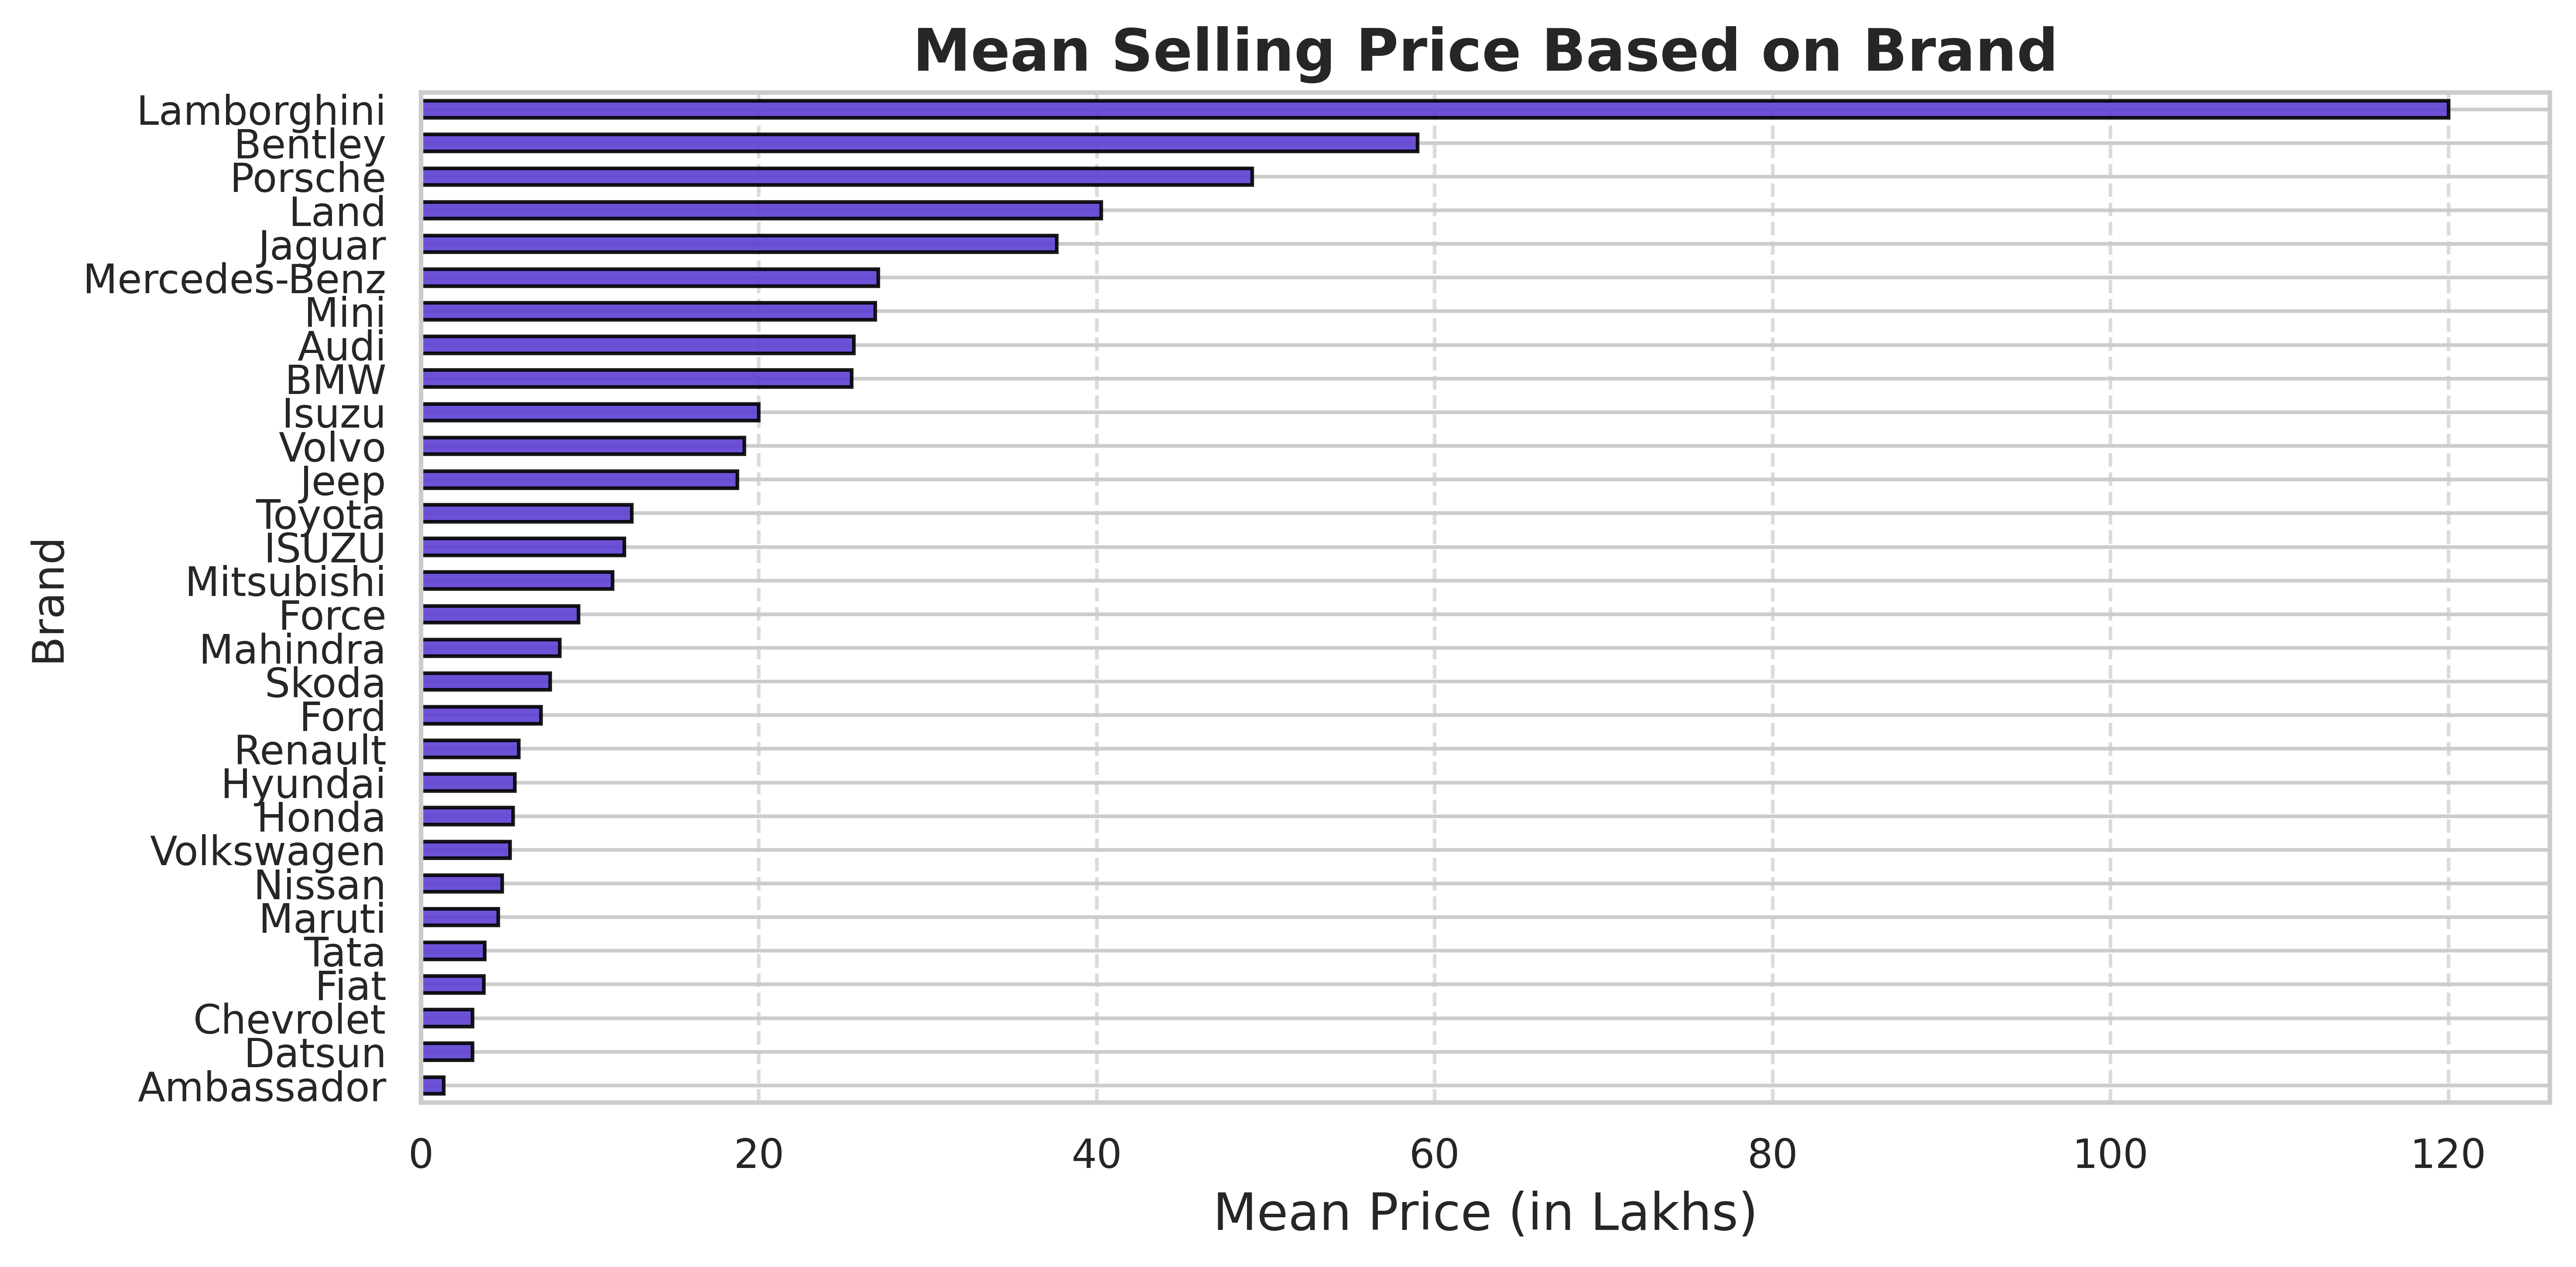

In [57]:
plt.figure(figsize=(10, 5), dpi=600)

# Grouping by Brand and calculating the mean price, then sorting the values
mean_price_by_brand = train.groupby('Brand', observed=True)['Price'].mean().sort_values()

# Create the horizontal bar plot with dark violet color scheme
mean_price_by_brand.plot(kind='barh', color='#5D3FD3', alpha=0.9, edgecolor='black')

# Adding labels and title
plt.xlabel('Mean Price (in Lakhs)', fontsize=14)
plt.title('Mean Selling Price Based on Brand', fontweight='bold', fontsize=16)

# Adding a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

<ipython-input-58-9a7ebc21e017>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Brand', y='Price', data=train, palette=palette)
<ipython-input-58-9a7ebc21e017>:7: UserWarning: 
The palette list has fewer values (1) than needed (30) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x='Brand', y='Price', data=train, palette=palette)
<ipython-input-58-9a7ebc21e017>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right')


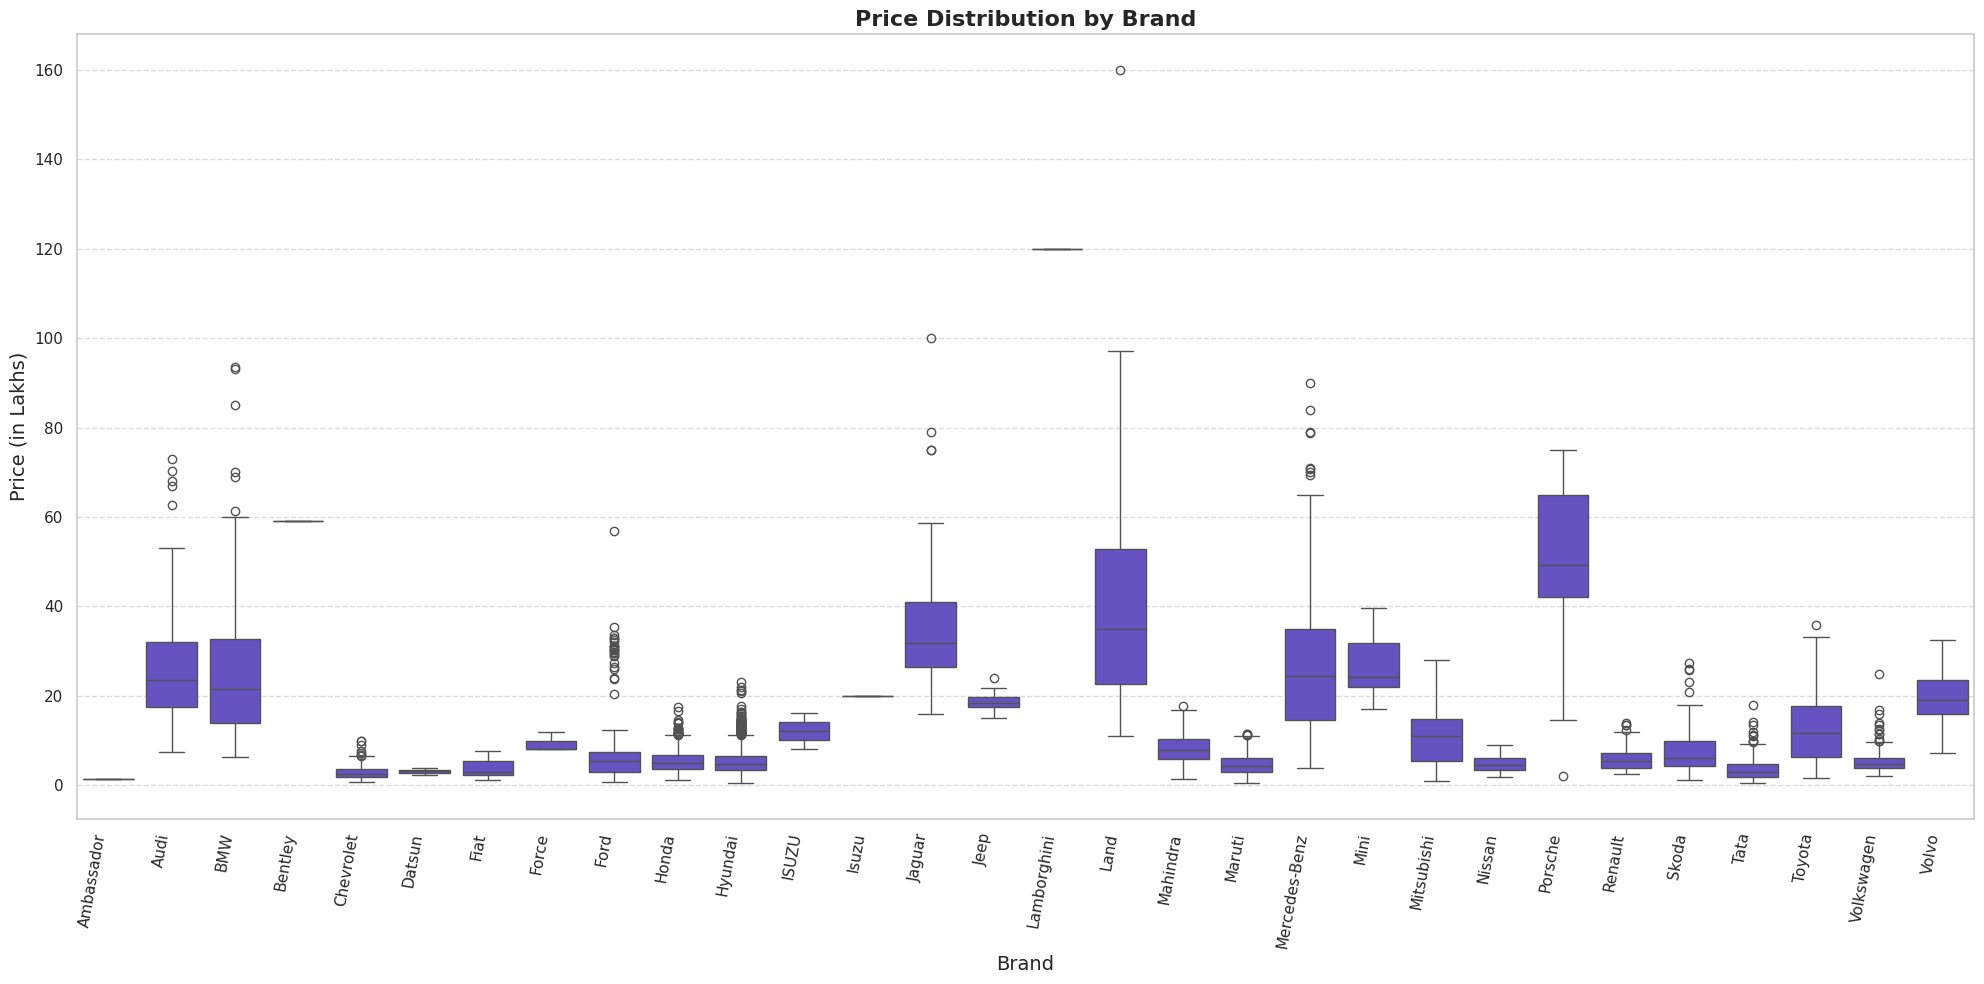

In [58]:
sns.set(rc={'figure.figsize': (20, 10)})  # Increased width
sns.set_theme(style='whitegrid')

palette = ['#5D3FD3']  # Dark violet color for all brands

# Create the box plot
ax = sns.boxplot(x='Brand', y='Price', data=train, palette=palette)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right')

# Adding labels and title
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price (in Lakhs)', fontsize=14)
plt.title('Price Distribution by Brand', fontweight='bold', fontsize=16)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

Brands with Engine Size > 3000 CC:
Brand
Ford             16
Mercedes-Benz    15
Audi              7
Land              5
Porsche           5
BMW               3
Jaguar            2
Skoda             2
Lamborghini       1
Bentley           1
Maruti            0
Tata              0
Nissan            0
Mitsubishi        0
Toyota            0
Mini              0
Volkswagen        0
Renault           0
Ambassador        0
Mahindra          0
Jeep              0
Isuzu             0
ISUZU             0
Hyundai           0
Honda             0
Force             0
Fiat              0
Datsun            0
Chevrolet         0
Volvo             0
Name: count, dtype: int64


<ipython-input-59-c1e4ef03e1b6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Engine', data=train, palette='coolwarm')


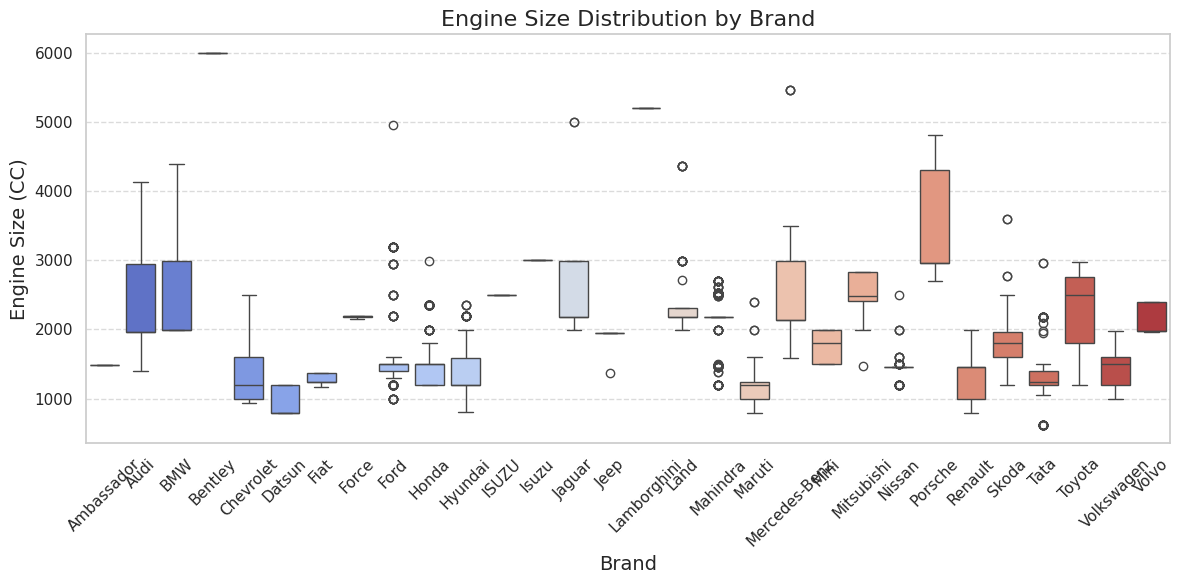

In [59]:
outlier_brands = train[train['Engine'] > 3000]['Brand'].value_counts()

# Display the count of brands with higher engine sizes
print("Brands with Engine Size > 3000 CC:")
print(outlier_brands)

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Engine', data=train, palette='coolwarm')
plt.title('Engine Size Distribution by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Engine Size (CC)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [60]:


def remove_outliers(feature, df):
    # Calculate Q1, Q2 (median), and Q3
    q1 = np.percentile(df[feature], 25)
    q2 = np.percentile(df[feature], 50)
    q3 = np.percentile(df[feature], 75)

    # Interquartile Range (IQR)
    iqr = q3 - q1

    # lower and upper whiskers
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    # DataFrame without outliers
    return df[(df[feature] >= lower_whisker) & (df[feature] <= upper_whisker)]


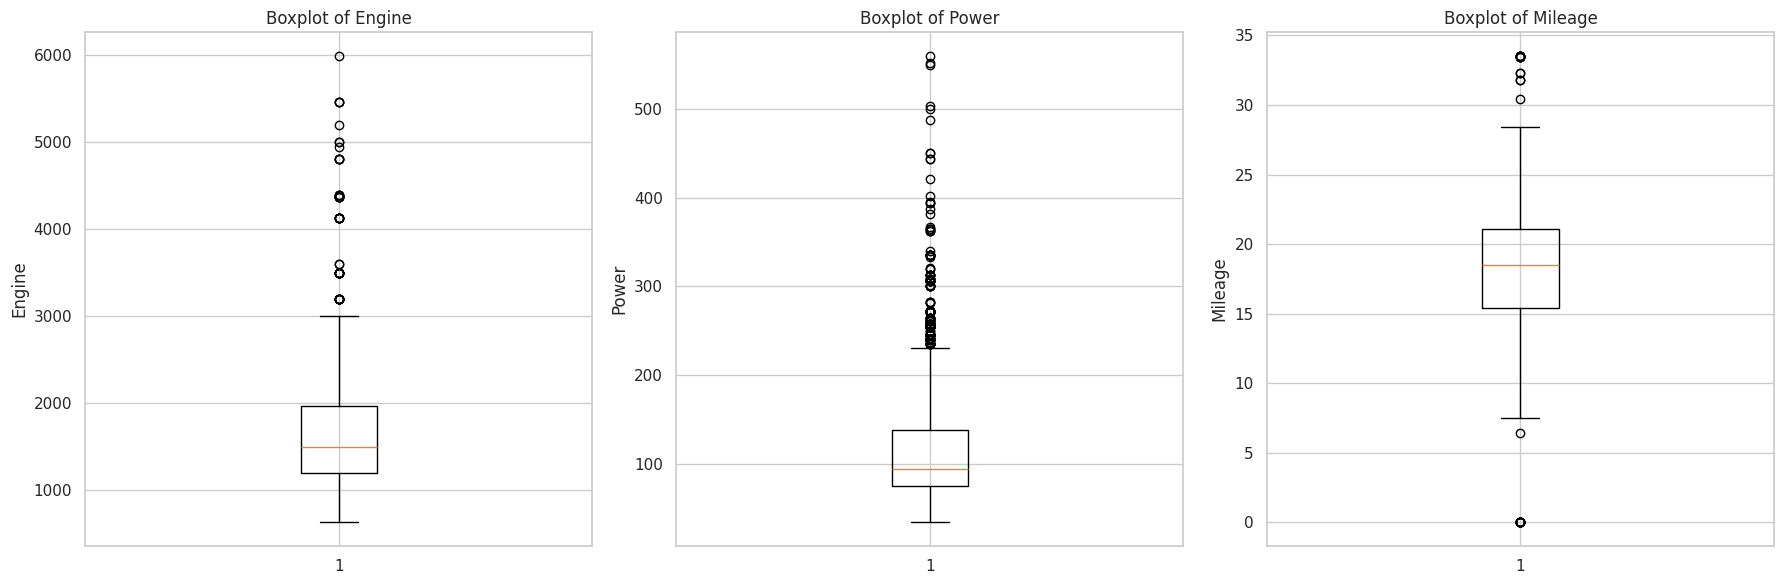

In [61]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 6), dpi=100)

# ----ENGINE----
plt.subplot(1, 3, 1)
plt.boxplot(train['Engine'])
plt.title('Boxplot of Engine')
plt.ylabel('Engine')

# ----POWER----
plt.subplot(1, 3, 2)
plt.boxplot(train['Power'])
plt.title('Boxplot of Power')
plt.ylabel('Power')

# ----MILEAGE----
plt.subplot(1, 3, 3)
plt.boxplot(train['Mileage'])
plt.title('Boxplot of Mileage')
plt.ylabel('Mileage')

# Show the plots
plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()




In [63]:
# Removing outliers from the dataset
train = remove_outliers('Engine', train)
train = remove_outliers('Power', train)
train = remove_outliers('Mileage', train)

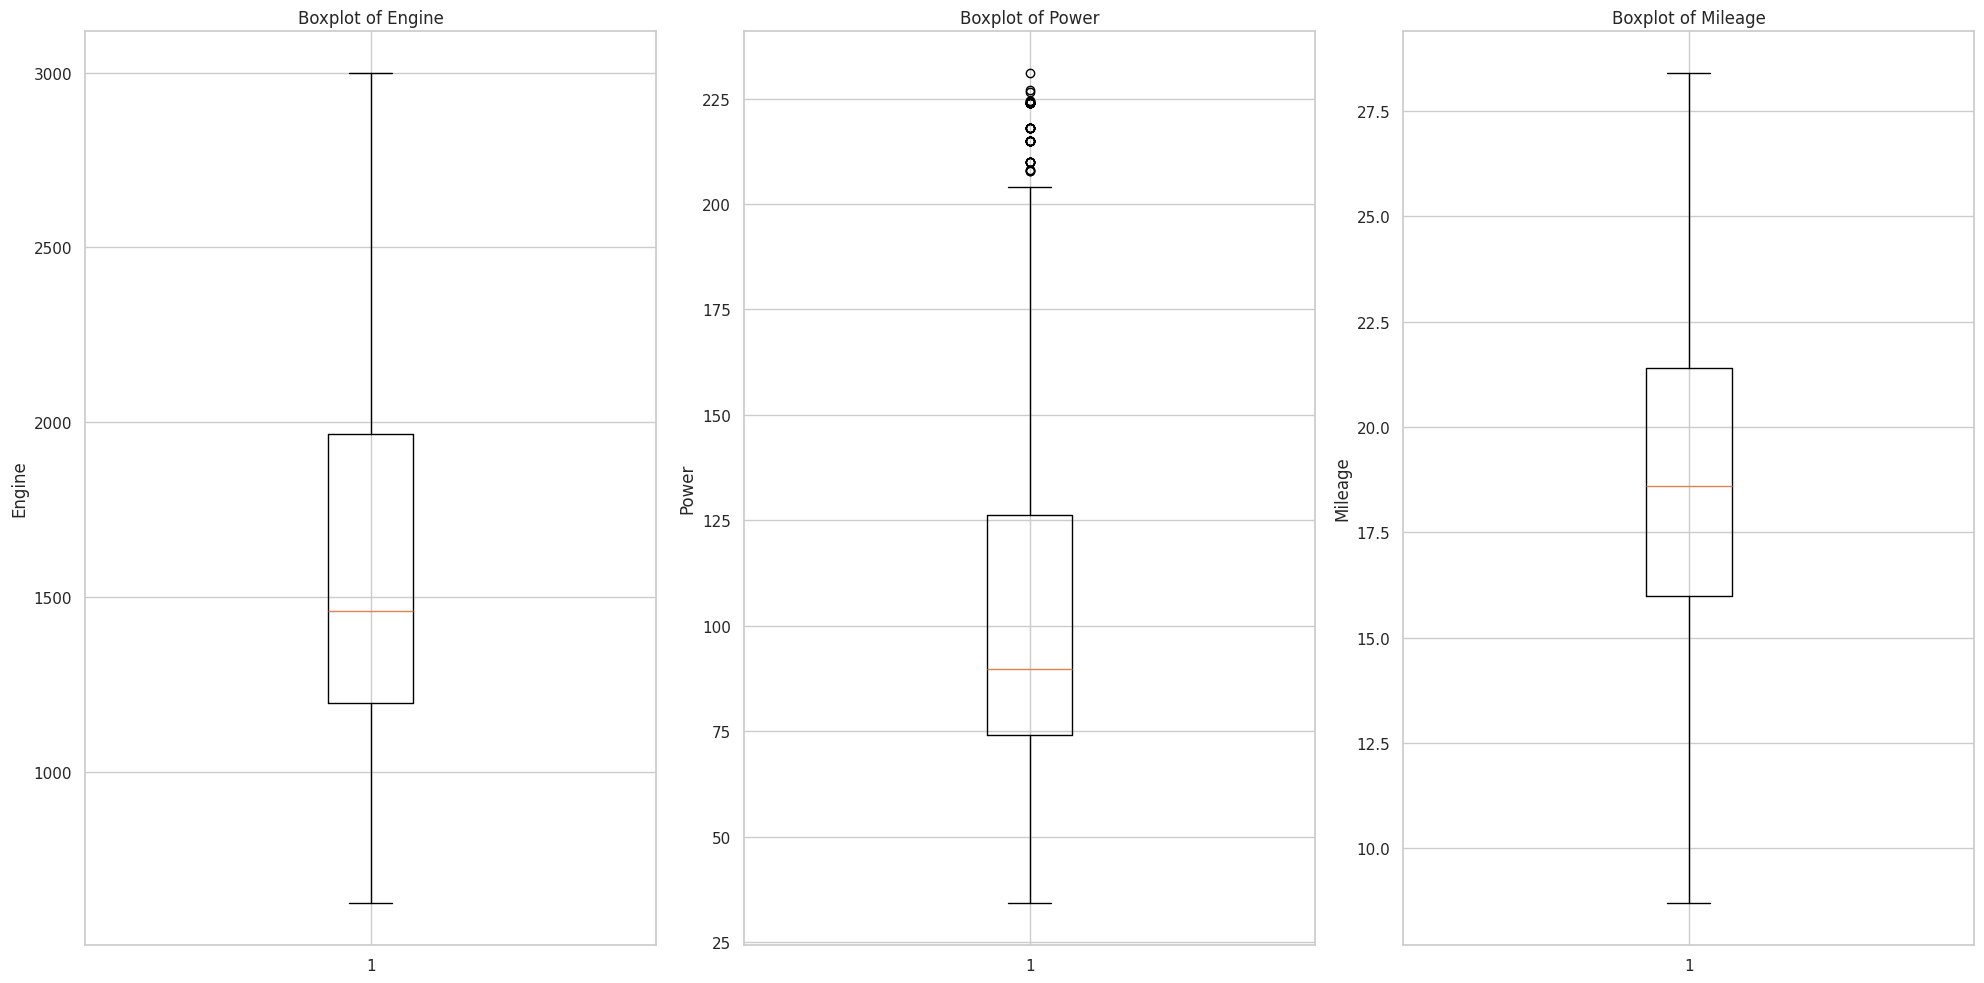

In [64]:
plt.subplot(1, 3, 1)
plt.boxplot(train['Engine'])
plt.title('Boxplot of Engine')
plt.ylabel('Engine')

# ----POWER----
plt.subplot(1, 3, 2)
plt.boxplot(train['Power'])
plt.title('Boxplot of Power')
plt.ylabel('Power')

# ----MILEAGE----
plt.subplot(1, 3, 3)
plt.boxplot(train['Mileage'])
plt.title('Boxplot of Mileage')
plt.ylabel('Mileage')

# Show the plots
plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

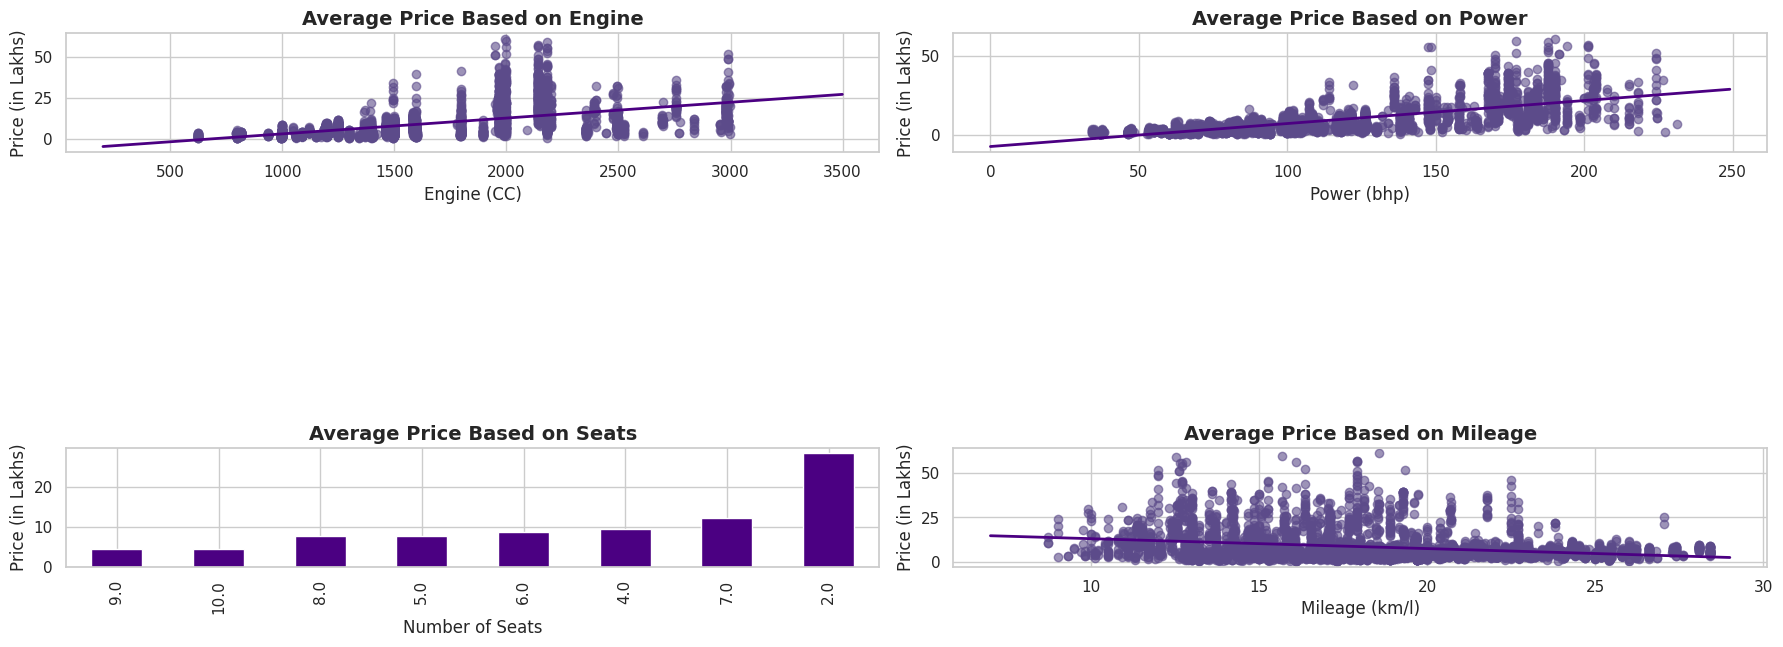

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_theme(style='whitegrid')
dark_violet_palette = ["#4B0082", "#5C4B8A", "#6A5ACD", "#836FFF"]
sns.set_palette(dark_violet_palette)


plt.figure(figsize=(18, 8), dpi=100)

# ---------ENGINE --------------
plt.subplot(4, 2, 1)
p = np.poly1d(np.polyfit(train['Engine'], train['Price'], 1))
xp = np.arange(200, 3500)

plt.scatter(train['Engine'], train['Price'], color='#5C4B8A', alpha=0.6, label='Data Points')
plt.plot(xp, p(xp), color='#4B0082', label='Trend Line', linewidth=2)
plt.title('Average Price Based on Engine', fontweight='bold', fontsize=14)
plt.ylabel('Price (in Lakhs)')
plt.xlabel('Engine (CC)')
plt.grid(True)

# ---------Power --------------
plt.subplot(4, 2, 2)
p = np.poly1d(np.polyfit(train['Power'], train['Price'], 1))
xp = np.arange(0, 250)

plt.scatter(train['Power'], train['Price'], color='#5C4B8A', alpha=0.6, label='Data Points')
plt.plot(xp, p(xp), color='#4B0082', label='Trend Line', linewidth=2)
plt.title('Average Price Based on Power', fontweight='bold', fontsize=14)
plt.ylabel('Price (in Lakhs)')
plt.xlabel('Power (bhp)')
plt.grid(True)

# ---------Seats --------------
plt.subplot(4, 2, 5)
train.groupby('Seats')['Price'].mean().sort_values().plot(kind='bar', color='#4B0082')
plt.title('Average Price Based on Seats', fontweight='bold', fontsize=14)
plt.ylabel('Price (in Lakhs)')
plt.xlabel('Number of Seats')
plt.grid(True)

# ---------Mileage--------------
plt.subplot(4, 2, 6)
p = np.poly1d(np.polyfit(train['Mileage'], train['Price'], 1))
xp = np.arange(7, 30)

plt.scatter(train['Mileage'], train['Price'], color='#5C4B8A', alpha=0.6, label='Data Points')
plt.plot(xp, p(xp), color='#4B0082', label='Trend Line', linewidth=2)
plt.title('Average Price Based on Mileage', fontweight='bold', fontsize=14)
plt.ylabel('Price (in Lakhs)')
plt.xlabel('Mileage (km/l)')
plt.grid(True)


plt.tight_layout()
plt.show()


## <font color='purple'>Section 3: Machine Learning Models </font>

## Preparing the data for predictive models




In [71]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [72]:
# Converting categorical columns to category type and assigning codes
train['Location_cat'] = train['Location'].astype('category').cat.codes
train['Fuel_Type_cat'] = train['Fuel_Type'].astype('category').cat.codes
train['Transmission_cat'] = train['Transmission'].astype('category').cat.codes
train['Owner_Type_cat'] = train['Owner_Type'].astype('category').cat.codes
train['Brand_cat'] = train['Brand'].astype('category').cat.codes

# Converting 'Year' column to category type and assigning codes
train['Year'] = train['Year'].astype('category')
train['Year_cat'] = train['Year'].cat.codes

# Displaying the first few rows of the DataFrame to check the changes
train.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Location_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Brand_cat,Year_cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,9,0,1,0,18,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,10,1,1,0,10,17
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,2,3,1,0,9,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,2,1,1,0,18,14
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,3,1,0,2,1,15


In [73]:
# Shuffling the dataset
train = train.sample(frac=1).reset_index(drop=True)

# Display the first few rows to verify the shuffle
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Location_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Brand_cat,Year_cat
0,Volkswagen Polo Diesel Comfortline 1.2L,Hyderabad,2012,107023,Diesel,Manual,First,22.07,1199.0,73.9,5.0,3.90,Volkswagen,5,1,1,0,28,14
1,Maruti Swift VDI,Kochi,2017,34613,Diesel,Manual,First,28.40,1248.0,74.0,5.0,6.24,Maruti,7,1,1,0,18,19
2,Maruti Swift VDI BSIV,Jaipur,2014,71000,Diesel,Manual,First,25.20,1248.0,74.0,5.0,4.80,Maruti,6,1,1,0,18,16
3,Mercedes-Benz E-Class 2009-2013 E250 CDI Elegance,Pune,2016,45000,Diesel,Automatic,First,14.21,2143.0,203.0,5.0,34.00,Mercedes-Benz,10,1,0,0,19,18
4,Hyundai i10 Sportz AT,Ahmedabad,2012,37229,Petrol,Automatic,First,16.95,1197.0,78.9,5.0,3.41,Hyundai,0,3,0,0,10,14


To randomly shuffle the train dataset and reset the index, which is useful for ensuring the data order is randomized. The frac=1 parameter ensures that all rows are included in the shuffle. The reset_index(drop=True) function removes the old index and replaces it with a new one.

- X = Different Categories
- Y= Price

In [74]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scale = StandardScaler()

# Define X and y using the train DataFrame
X = train[['Location_cat', 'Fuel_Type_cat', 'Transmission_cat', 'Owner_Type_cat', 'Brand_cat', 'Year_cat', 'Engine', 'Power', 'Seats']]
y = train.Price

# Display the first few rows of X to check
X.head()

,Location_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Brand_cat,Year_cat,Engine,Power,Seats
0,5,1,1,0,28,14,1199.0,73.9,5.0
1,7,1,1,0,18,19,1248.0,74.0,5.0
2,6,1,1,0,18,16,1248.0,74.0,5.0
3,10,1,0,0,19,18,2143.0,203.0,5.0
4,0,3,0,0,10,14,1197.0,78.9,5.0


### Splitting the dataset into train and test

In [75]:
# Splitting training and testing data
# Train Test Split

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# shapes of the resulting datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4308, 9) (4308,)
(1078, 9) (1078,)


In [76]:
# Scaling continuous features (No scaling for categorical variables)
X_train[['Engine', 'Power']] = scale.fit_transform(X_train[['Engine', 'Power']])

# Fit the OLS model
est = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression results
print(est.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                              2570.
Date:                Sat, 02 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:41:42   Log-Likelihood:                         -12615.
No. Observations:                4308   AIC:                                  2.525e+04
Df Residuals:                    4299   BIC:                                  2.531e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [77]:
# Scaling continuous features in the test set
X_test[['Engine', 'Power']] = scale.transform(X_test[['Engine', 'Power']])

# Predicting values for the testing data
y_predicted = est.predict(X_test)

# Displaying the predicted values
print(y_predicted)


5087    23.867123
2575     7.938899
3334     4.485666
84       6.376538
4651     1.055885
          ...    
4140     3.605225
4634     7.165457
621      4.419627
566      5.104946
4834     4.094328
Length: 1078, dtype: float64


In [78]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predicted)
print(r2)

0.712206905880396


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_predicted)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate R-squared
r2 = r2_score(y_test, y_predicted)
print(f'R-squared (R²): {r2:.2f}')


Mean Absolute Error (MAE): 2.91
Mean Squared Error (MSE): 19.40
R-squared (R²): 0.71


- Mean Absolute Error (MAE): 2.91: On average, your model's predictions deviate from the actual prices by about ₹2.91 lakhs. This is a relatively small error depending on the price range of the dataset.

- Mean Squared Error (MSE): 19.40: This metric indicates the average of the squares of the errors. A lower MSE suggests a better fit, but it can be sensitive to outliers. Needs improvements.

- R-squared (R²): 0.71: This means that about 71% of the variance in the price can be explained by the independent variables in your model.  R² value above 0.7 is considered a good fit, especially in real estate or vehicle price prediction models, where many factors can affect price.

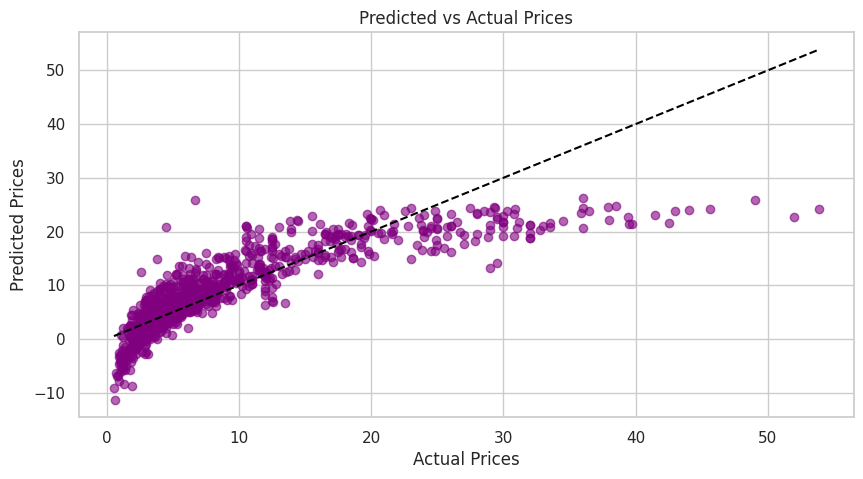

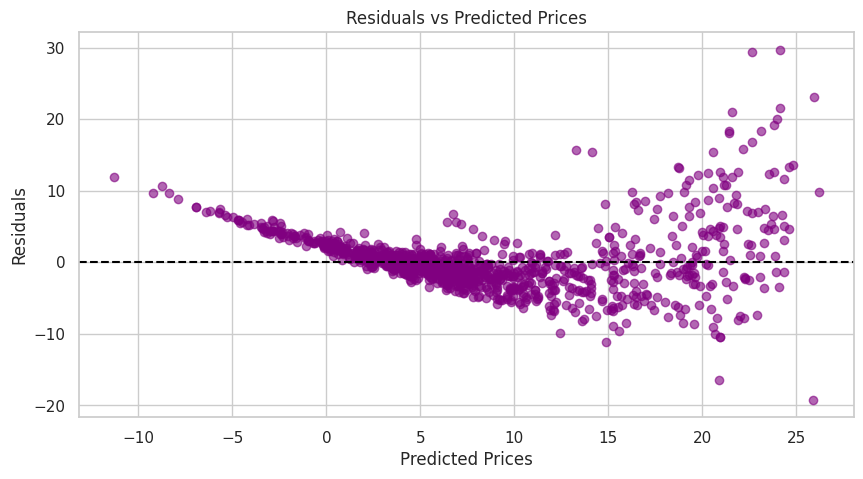

In [81]:

# Plotting Predicted vs Actual Prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_predicted, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')  # Diagonal line
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Residual Analysis
residuals = y_test - y_predicted

plt.figure(figsize=(10, 5))
plt.scatter(y_predicted, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')  # Line at zero
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


## Linear Regression Model

Cross Validation Scores:  [0.72514529 0.6258565  0.71018753 0.64168106 0.6799252  0.70952851
 0.66877085 0.69448734 0.69258501 0.70529854] 

Mean Cross Validation Score: 0.69
Cross Predicted Accuracy (R²):  0.6858732748568208


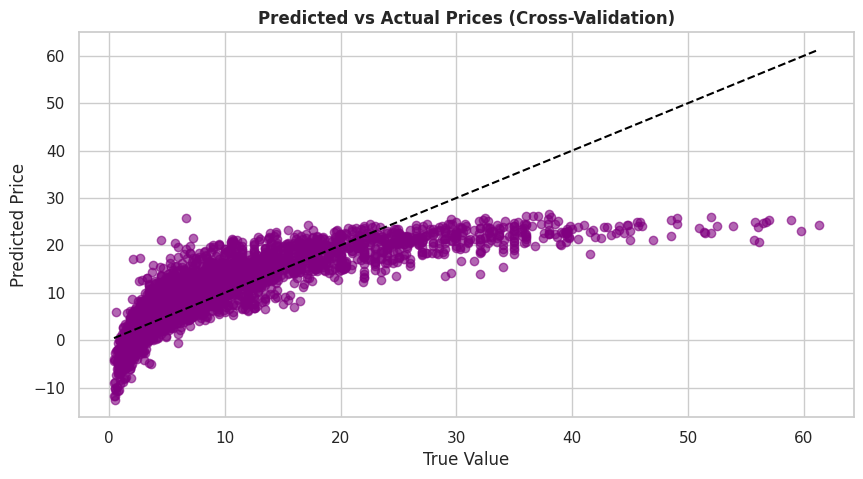

In [84]:


from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model


sns.set_theme(style='whitegrid')
dark_violet_palette = ["#4B0082", "#5C4B8A", "#6A5ACD", "#836FFF"]
sns.set_palette(dark_violet_palette)

# linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(X, y)

# ---------Cross-Validation Scores------------
scores = cross_val_score(model, X, y, cv=10)  # K = 10 Folds
print("Cross Validation Scores: ", scores, '\n')

# mean cross-validation score
mean_score = scores.mean()
print("Mean Cross Validation Score: {:.2f}".format(mean_score))

# ---------Predicting Price with K Folds Validation------------
predictions = cross_val_predict(model, X, y, cv=10)
accuracy = r2_score(y, predictions)
print("Cross Predicted Accuracy (R²): ", accuracy)

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.scatter(y, predictions, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')  # Diagonal line
plt.title('Predicted vs Actual Prices (Cross-Validation)', fontweight='bold')
plt.ylabel('Predicted Price')
plt.xlabel('True Value')
plt.grid(True)
plt.show()



As the Multiple Regression Model predicted negative prices as well, I decided to use Random Forest Regressor.

## Random Forest Regressor

Mean Absolute Error (MAE): 1.30
Mean Squared Error (MSE): 6.48
R-squared (R²): 0.90


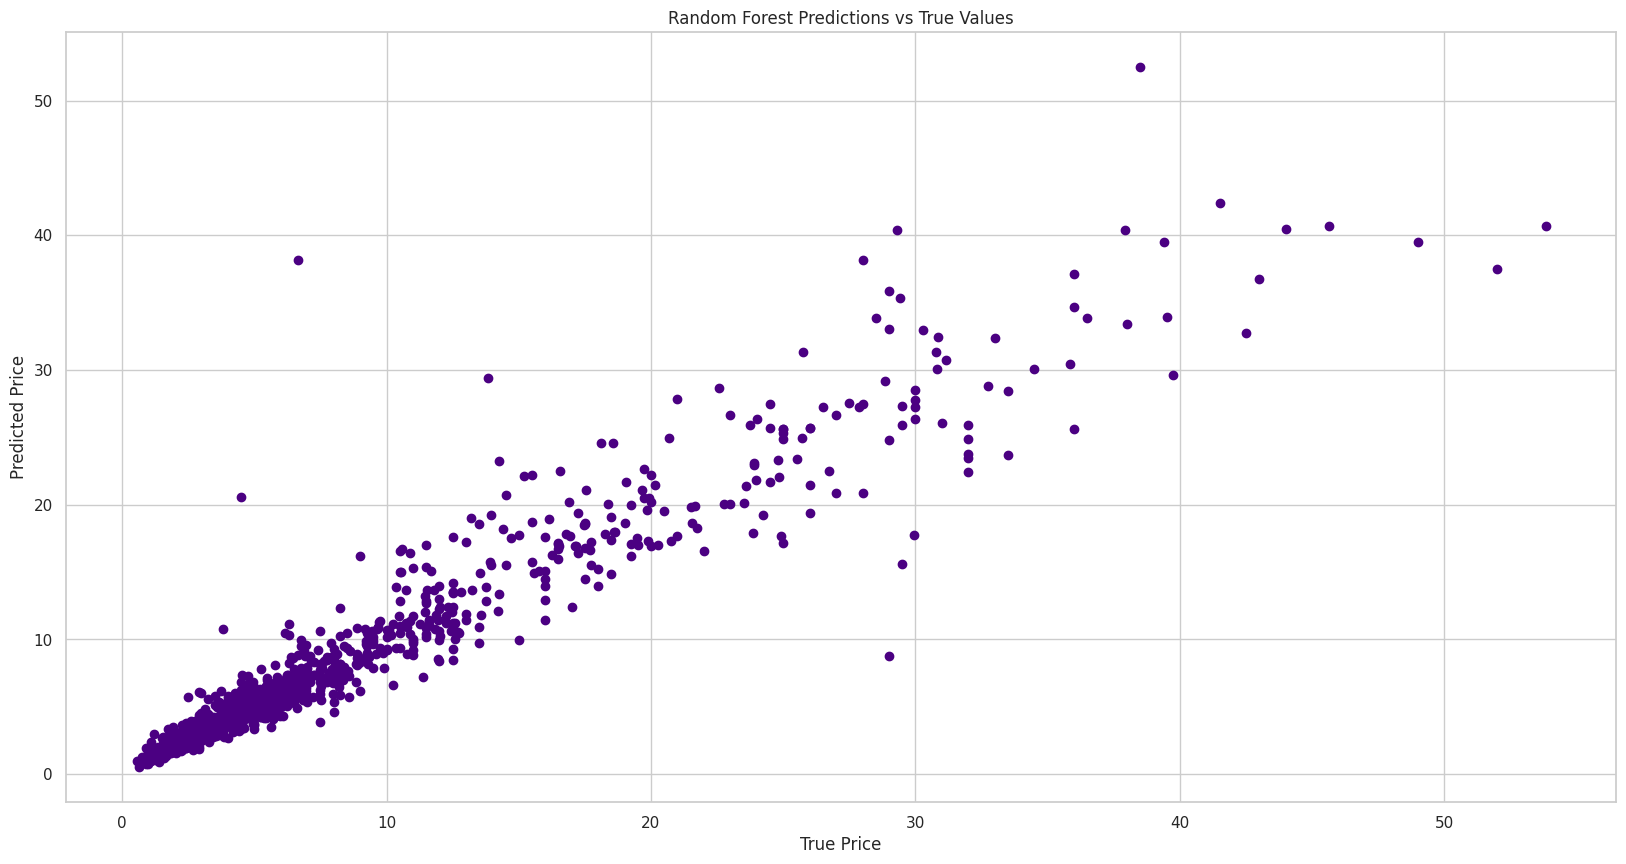

In [83]:
r2 = r2_score(y_test, y_predicted)
r2from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculating metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'R-squared (R²): {r2_rf:.2f}')

# Scatter plot of predictions vs true values
plt.scatter(y_test, y_pred_rf)
plt.ylabel('Predicted Price')
plt.xlabel('True Price')
plt.title('Random Forest Predictions vs True Values')
plt.show()


Cross Validation Scores:  [0.90856793 0.88846981 0.92209401 0.86257347 0.94039285 0.9220686
 0.90723883 0.9387943  0.90659497 0.9152458 ] 

Cross Predicted Accuracy:  0.9123107834868214


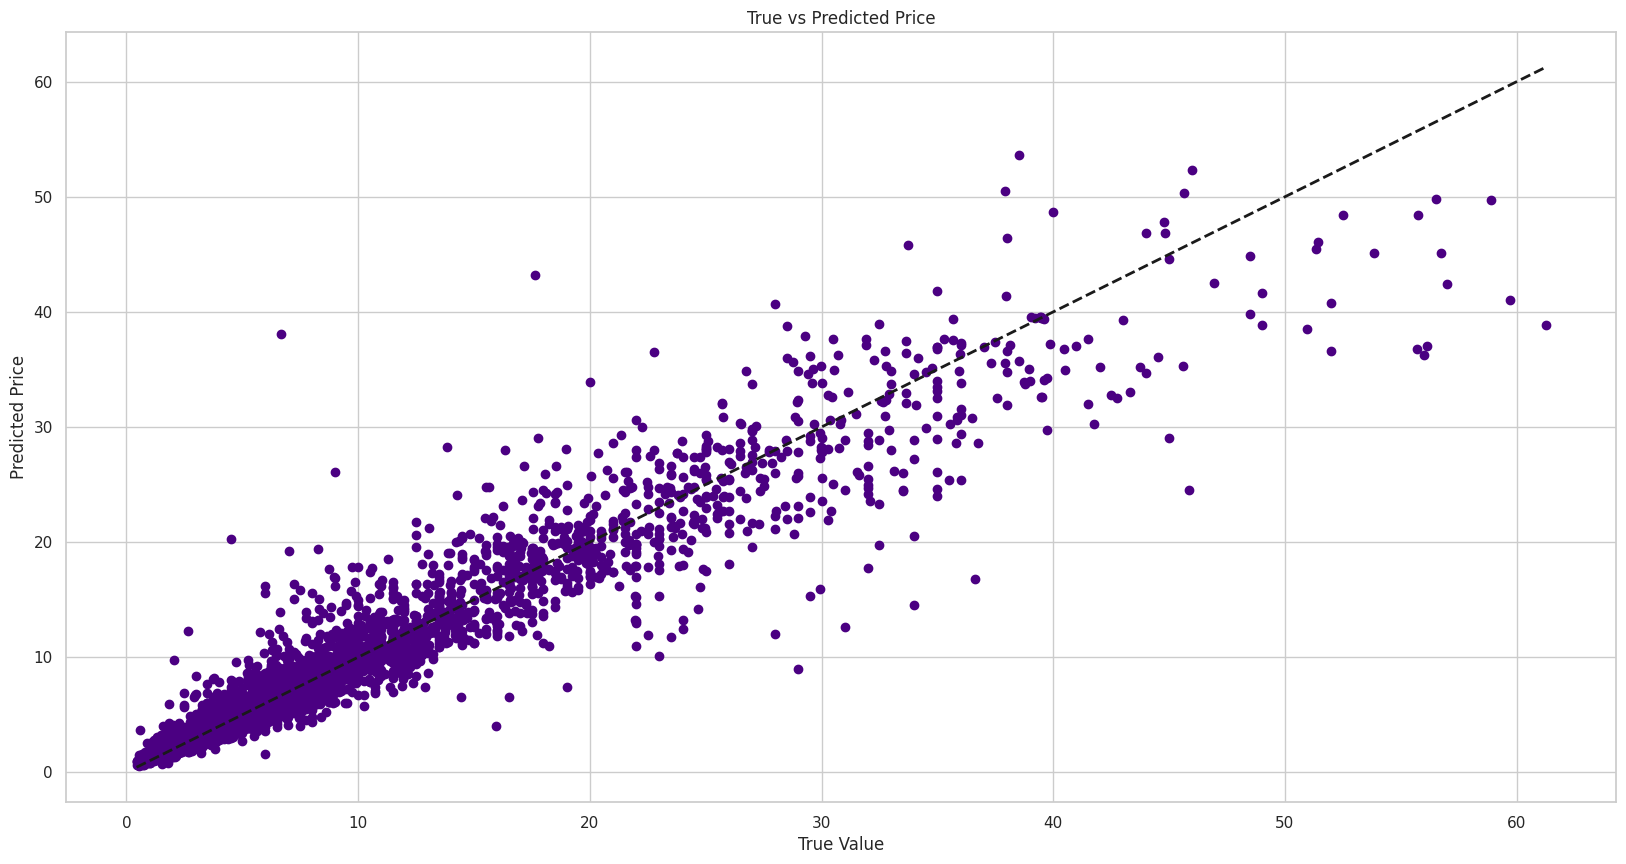

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize the Random Forest model
RFModel = RandomForestRegressor(random_state=42)

# ---------Fitting Model and Training K-1 subsets------------
scores = cross_val_score(RFModel, X, y, cv=10)  # K = 10 Folds
print("Cross Validation Scores: ", scores, '\n')

# ---------Predicting Price with K Folds Validation------------
predictions = cross_val_predict(RFModel, X, y, cv=10)
accuracy = r2_score(y, predictions)

print("Cross Predicted Accuracy: ", accuracy)

# Visualizing the predicted vs actual prices
plt.scatter(y, predictions)
plt.ylabel('Predicted Price')
plt.xlabel('True Value')
plt.title('True vs Predicted Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


Based on the graph, we can conclude that our model performs quite well for vehicles priced in the lower to mid-range. However, as the price increases, the predictions begin to diverge slightly from the actual values.

# Price Predictions using the Test Data

In this analysis, I aimed to predict the prices using the Test_Data.xlsx file. As the actual prices were not available for testing, I divided the training_data.xlsx into separate Training and Testing datasets.

If you possess the true prices for the Test  dataset, and we are pleased to present the predicted prices for your review.

In [97]:
test_df = pd.read_excel('testing_data.xlsx')
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [101]:

# training data
training_data = pd.read_excel('training_data.xlsx')


training_data.dropna(how='any', inplace=True)
training_data['Mileage'] = training_data['Mileage'].str.replace('km/kg', '').str.replace('kmpl', '').astype(float)
training_data['Engine'] = training_data['Engine'].str.replace('CC', '').astype(float)
training_data['Power'] = training_data['Power'].str.replace('bhp', '').str.strip()
training_data = training_data[training_data['Power'] != 'null']
training_data['Power'] = training_data['Power'].astype(float)


training_data['Brand'] = training_data['Name'].str.split().str[0]


for col in ['Fuel_Type', 'Transmission', 'Location', 'Brand', 'Owner_Type']:
    training_data[col] = training_data[col].astype('category')

# Create categorical codes
training_data['Location_cat'] = training_data['Location'].cat.codes
training_data['Fuel_Type_cat'] = training_data['Fuel_Type'].cat.codes
training_data['Transmission_cat'] = training_data['Transmission'].cat.codes
training_data['Owner_Type_cat'] = training_data['Owner_Type'].cat.codes
training_data['Brand_cat'] = training_data['Brand'].cat.codes
training_data['Year'] = training_data['Year'].astype('category')
training_data['Year_cat'] = training_data['Year'].cat.codes

# Define features and target variable
X = training_data[['Location_cat', 'Fuel_Type_cat', 'Transmission_cat',
                   'Owner_Type_cat', 'Brand_cat', 'Year_cat', 'Engine', 'Power', 'Seats']]
y = training_data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
RFModel = RandomForestRegressor(n_estimators=100, random_state=42)
RFModel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RFModel.predict(X_test)


#DataFrame to compare actual vs predicted prices
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(results.reset_index(drop=True))


      Actual Price  Predicted Price
0            31.00        17.155500
1            12.50        10.782417
2            19.90        24.158329
3             8.92         8.663822
4            24.68        15.641600
...            ...              ...
1170          7.11         6.829830
1171          7.52         6.655983
1172          7.75         7.516433
1173          3.25         3.586000
1174          2.00         3.217983

[1175 rows x 2 columns]


## Analysis of Price Predictions

The comparison between the actual prices and  predicted prices shows that the model tends to predict lower prices more accurately. For example, in the first few entries:

An actual price of 31.00 was predicted as 17.16.
An actual price of 12.50 was predicted as 10.78.
In contrast, for higher price points like 19.90, the predicted price was 24.16, indicating a tendency for overestimation.
This pattern suggests that while the model may capture the trends in the data, it struggles with higher price ranges, potentially due to fewer examples of high-priced items in the training set or greater variability in those price points.

Further analysis and adjustments might be necessary to improve the model's performance on higher price ranges, such as exploring different algorithms, tuning hyperparameters, or engineering additional features that can capture the nuances of more expensive vehicles.